In [80]:
#Dataset link
#https://drive.google.com/file/d/1cCkwiVv4mgfl20ntgY3n4yApcWqqZQe6/view

Import Libraries

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Importing Dataset

In [91]:
movies_data = pd.read_csv('updated_movie.csv')
movies_data.head()

id                           title                             genres  \
0  631842              Knock at the Cabin            Horror-Mystery-Thriller   
1  646389                           Plane          Action-Adventure-Thriller   
2  315162    Puss in Boots: The Last Wish  Animation-Adventure-Comedy-Family   
3  505642  Black Panther: Wakanda Forever   Action-Adventure-Science Fiction   
4  956101               The Eighth Clause                           Thriller   

  original_language                                           overview  \
0                en  While vacationing at a remote cabin a young gi...   
1                en  After a heroic job of successfully landing his...   
2                en  Puss in Boots discovers that his passion for a...   
3                en  Queen Ramonda Shuri M’Baku Okoye and the Dora ...   
4                la  Kat and Borja appear to be a perfect couple bu...   

   popularity                               production_companies release_date  \
0    3422.537  Blinding Edge Pictures-Universal Pictures-Film...   2023-02-01   
1    2618.646  MadRiver Pictures-Di Bonaventura Pictures-G-BA...   2023-01-12   
2    2589.341            DreamWorks Animation-Universal Pictures   2022-12-07   
3    2525.408                                     Marvel Studios   2022-11-09   
4    2259.303                       SDB Films-El Hombre Orquesta   2022-04-29   

        budget      revenue  runtime    status  \
0   20000000.0   52000000.0    100.0  Released   
1   25000000.0   51000000.0    107.0  Released   
2   90000000.0  442000000.0    103.0  Released   
3  250000000.0  858535561.0    162.0  Released   
4          0.0          0.0      0.0  Released   

                                             tagline  vote_average  \
0  Save your family or save humanity. Make the ch...         6.457   
1                     Survive together or die alone.         6.901   
2                    Say hola to his little friends.         8.402   
3                                           Forever.         7.338   
4                                                NaN         4.600   

   vote_count                                            credits  \
0       888.0  Dave Bautista-Jonathan Groff-Ben Aldridge-Kris...   
1       785.0  Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...   
2      4357.0  Antonio Banderas-Salma Hayek-Harvey Guillén-Wa...   
3      3922.0  Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...   
4        10.0  Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...   

                                            keywords  \
0  based on novel or book-sacrifice-cabin-faith-e...   
1  pilot-airplane-philippines-held hostage-plane ...   
2  fairy tale-talking dog-spin off-aftercreditsst...   
3  loss of loved one-hero-sequel-superhero-based ...   
4                                                NaN   

                        poster_path                     backdrop_path  \
0  /dm06L9pxDOL9jNSK4Cb6y139rrG.jpg  /zWDMQX0sPaW2u0N2pJaYA8bVVaJ.jpg   
1  /qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg  /9Rq14Eyrf7Tu1xk0Pl7VcNbNh1n.jpg   
2  /kuf6dutpsT0vSVehic3EZIqkOBt.jpg  /b1Y8SUb12gPHCSSSNlbX4nB3IKy.jpg   
3  /sv1xJUazXeYqALzczSZ3O6nkH75.jpg  /xDMIl84Qo5Tsu62c9DGWhmPI67A.jpg   
4  /8tc8eMFAX2SDC1TRu987qFQy8Cl.jpg  /kLnqNE9Af5QHyvUxw8cDGhF1ilv.jpg   

                                     recommendations  
0  1058949-646389-772515-505642-143970-667216-104...  
1  505642-758769-864692-631842-1058949-925943-758...  
2  536554-76600-816904-653851-899112-985335-83078...  
3  436270-829280-76600-56969-312634-1037858-238-5...  
4                                                NaN

<BarContainer object of 25 artists>

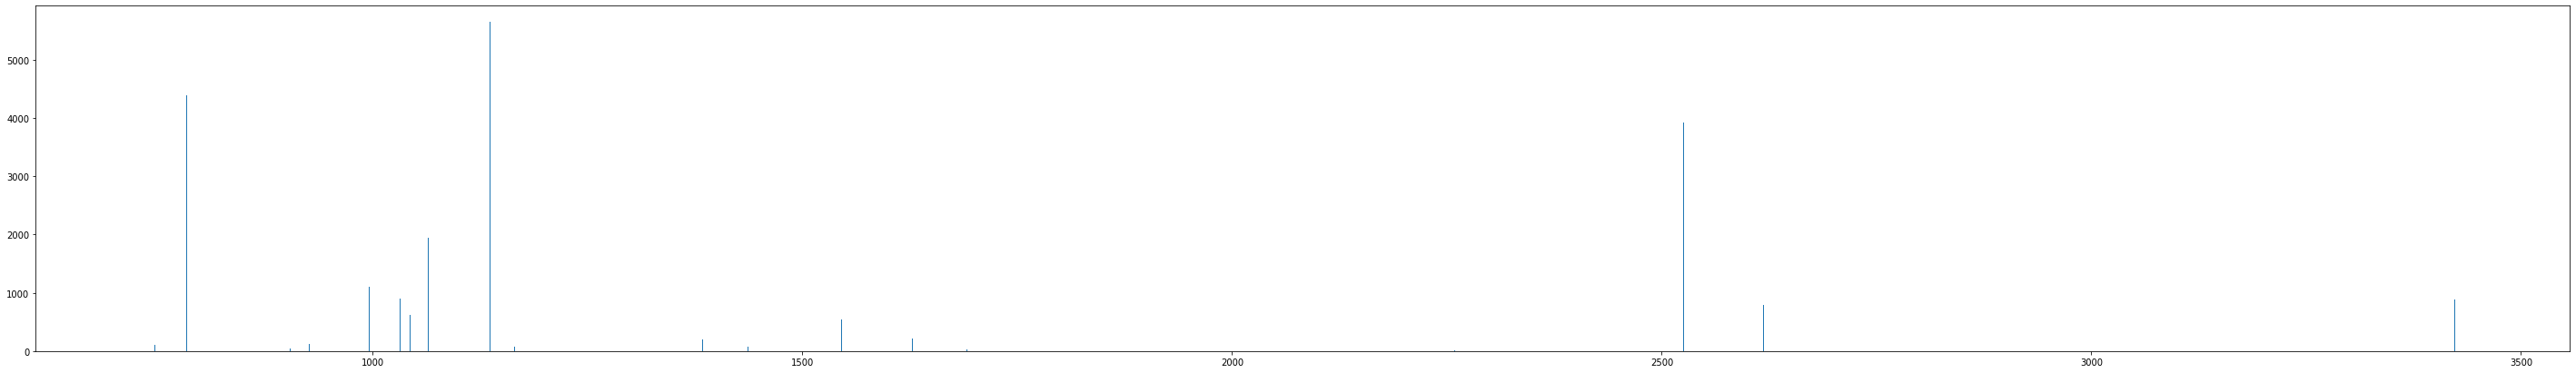

In [92]:
# Setting DataFrame
df = pd.DataFrame(movies_data)

# Setting the variables
x_axis = df['popularity']
y_axis = df['vote_count']

# Figure Size
from matplotlib import pyplot as plt
fig = plt.figure(figsize =(50, 7))

# Create bar graph, contingency table using any 2 features.
plt.bar(x_axis[:25], y_axis[:25])

<AxesSubplot:xlabel='popularity', ylabel='vote_count'>

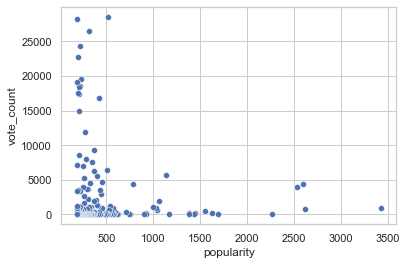

In [93]:
#Plot Scatter plot using seaborn.
sns.set(style='whitegrid')
x_axis = df['popularity'].head(200)
y_axis = df['vote_count'].head(200)
sns.scatterplot(x=x_axis, y=y_axis, data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1436.445'),
  Text(1, 0, '1440.505'),
  Text(2, 0, '1545.382'),
  Text(3, 0, '1627.738'),
  Text(4, 0, '1691.825'),
  Text(5, 0, '2259.303'),
  Text(6, 0, '2525.408'),
  Text(7, 0, '2589.341'),
  Text(8, 0, '2618.646'),
  Text(9, 0, '3422.537')])

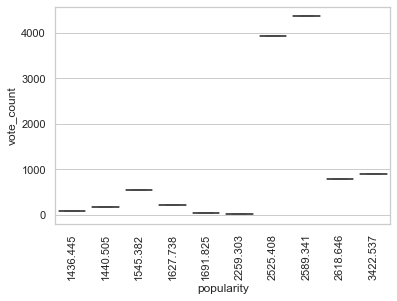

In [94]:
#Plot box plot using seaborn.
x_axis = df['popularity'].head(10)
y_axis = df['vote_count'].head(10)
sns.boxplot( y=y_axis, x=x_axis);
plt.xticks(rotation = 90)

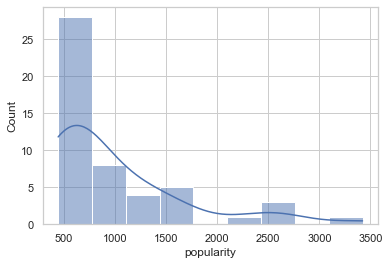

In [95]:
from matplotlib import pyplot as plt
sns.histplot(df['popularity'][:50],kde = True)
plt.show()

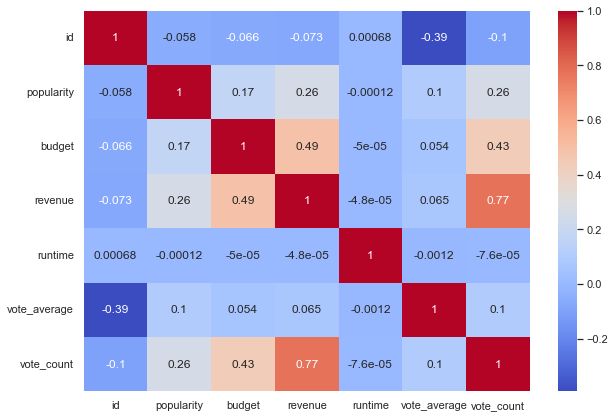

In [96]:
#Heatmap
sns.set(rc={"figure.figsize":(10,7)})
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [97]:
movies_data.shape

(723013, 20)

In [98]:
#id,title,overview,genres,keywords

In [99]:
movies = movies_data[['id','title','genres','production_companies','tagline','keywords','poster_path']]

In [100]:
movies.dropna(inplace=True)
movies.isnull().sum()
movies.duplicated().sum()
movies.drop_duplicates(inplace=True)
movies.shape

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\2908781970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\2908781970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop_duplicates(inplace=True)


(45722, 7)

In [101]:
movies.head()

id                           title                             genres  \
0  631842              Knock at the Cabin            Horror-Mystery-Thriller   
1  646389                           Plane          Action-Adventure-Thriller   
2  315162    Puss in Boots: The Last Wish  Animation-Adventure-Comedy-Family   
3  505642  Black Panther: Wakanda Forever   Action-Adventure-Science Fiction   
6  677179                       Creed III                       Drama-Action   

                                production_companies  \
0  Blinding Edge Pictures-Universal Pictures-Film...   
1  MadRiver Pictures-Di Bonaventura Pictures-G-BA...   
2            DreamWorks Animation-Universal Pictures   
3                                     Marvel Studios   
6  Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...   

                                             tagline  \
0  Save your family or save humanity. Make the ch...   
1                     Survive together or die alone.   
2                    Say hola to his little friends.   
3                                           Forever.   
6                      You can't run from your past.   

                                            keywords  \
0  based on novel or book-sacrifice-cabin-faith-e...   
1  pilot-airplane-philippines-held hostage-plane ...   
2  fairy tale-talking dog-spin off-aftercreditsst...   
3  loss of loved one-hero-sequel-superhero-based ...   
6  philadelphia pennsylvania-sequel-orphan-former...   

                        poster_path  
0  /dm06L9pxDOL9jNSK4Cb6y139rrG.jpg  
1  /qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg  
2  /kuf6dutpsT0vSVehic3EZIqkOBt.jpg  
3  /sv1xJUazXeYqALzczSZ3O6nkH75.jpg  
6  /cvsXj3I9Q2iyyIo95AecSd1tad7.jpg

In [102]:
movies.drop(index=movies.tail(21000).index, inplace=True)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\3714056063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop(index=movies.tail(21000).index, inplace=True)


In [103]:
movies.shape

(24722, 7)

In [104]:
import pickle

pickle.dump(movies,open('artifacts/cleaned_movies.pkl','wb'))

In [105]:
def split_genres(genre_string):
    return genre_string.split("-")

# Apply the function to the genres column
movies['genres'] = movies['genres'].apply(split_genres)
movies['production_companies'] = movies['production_companies'].apply(split_genres)
movies['keywords'] = movies['keywords'].apply(split_genres)


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\2075860557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(split_genres)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\2075860557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['production_companies'] = movies['production_companies'].apply(split_genres)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\2075860557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [106]:
# Define a function to split the tagline string into a list of words
def split_tagline(tagline_string):
    return tagline_string.split()

# Apply the function to the tagline column
movies['tagline'] = movies['tagline'].apply(split_tagline)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\1235512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tagline'] = movies['tagline'].apply(split_tagline)


In [107]:
movies.head()

id                           title  \
0  631842              Knock at the Cabin   
1  646389                           Plane   
2  315162    Puss in Boots: The Last Wish   
3  505642  Black Panther: Wakanda Forever   
6  677179                       Creed III   

                                   genres  \
0             [Horror, Mystery, Thriller]   
1           [Action, Adventure, Thriller]   
2  [Animation, Adventure, Comedy, Family]   
3    [Action, Adventure, Science Fiction]   
6                         [Drama, Action]   

                                production_companies  \
0  [Blinding Edge Pictures, Universal Pictures, F...   
1  [MadRiver Pictures, Di Bonaventura Pictures, G...   
2         [DreamWorks Animation, Universal Pictures]   
3                                   [Marvel Studios]   
6  [Metro, Goldwyn, Mayer, Proximity Media, Balbo...   

                                             tagline  \
0  [Save, your, family, or, save, humanity., Make...   
1               [Survive, together, or, die, alone.]   
2             [Say, hola, to, his, little, friends.]   
3                                         [Forever.]   
6               [You, can't, run, from, your, past.]   

                                            keywords  \
0  [based on novel or book, sacrifice, cabin, fai...   
1  [pilot, airplane, philippines, held hostage, p...   
2  [fairy tale, talking dog, spin off, aftercredi...   
3  [loss of loved one, hero, sequel, superhero, b...   
6  [philadelphia pennsylvania, sequel, orphan, fo...   

                        poster_path  
0  /dm06L9pxDOL9jNSK4Cb6y139rrG.jpg  
1  /qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg  
2  /kuf6dutpsT0vSVehic3EZIqkOBt.jpg  
3  /sv1xJUazXeYqALzczSZ3O6nkH75.jpg  
6  /cvsXj3I9Q2iyyIo95AecSd1tad7.jpg

In [108]:
def remove_space(word):
    l=[]
    for i in word:
        l.append(i.replace(" ",""))
    return l

In [109]:
movies['genres'] = movies['genres'].apply(remove_space)
movies['production_companies'] = movies['production_companies'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)
movies['tagline'] = movies['tagline'].apply(remove_space)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\3681893778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(remove_space)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\3681893778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['production_companies'] = movies['production_companies'].apply(remove_space)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\3681893778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [110]:
movies.head()

id                           title  \
0  631842              Knock at the Cabin   
1  646389                           Plane   
2  315162    Puss in Boots: The Last Wish   
3  505642  Black Panther: Wakanda Forever   
6  677179                       Creed III   

                                   genres  \
0             [Horror, Mystery, Thriller]   
1           [Action, Adventure, Thriller]   
2  [Animation, Adventure, Comedy, Family]   
3     [Action, Adventure, ScienceFiction]   
6                         [Drama, Action]   

                                production_companies  \
0  [BlindingEdgePictures, UniversalPictures, Film...   
1  [MadRiverPictures, DiBonaventuraPictures, G, B...   
2           [DreamWorksAnimation, UniversalPictures]   
3                                    [MarvelStudios]   
6  [Metro, Goldwyn, Mayer, ProximityMedia, Balboa...   

                                             tagline  \
0  [Save, your, family, or, save, humanity., Make...   
1               [Survive, together, or, die, alone.]   
2             [Say, hola, to, his, little, friends.]   
3                                         [Forever.]   
6               [You, can't, run, from, your, past.]   

                                            keywords  \
0  [basedonnovelorbook, sacrifice, cabin, faith, ...   
1  [pilot, airplane, philippines, heldhostage, pl...   
2  [fairytale, talkingdog, spinoff, aftercreditss...   
3  [lossoflovedone, hero, sequel, superhero, base...   
6  [philadelphiapennsylvania, sequel, orphan, for...   

                        poster_path  
0  /dm06L9pxDOL9jNSK4Cb6y139rrG.jpg  
1  /qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg  
2  /kuf6dutpsT0vSVehic3EZIqkOBt.jpg  
3  /sv1xJUazXeYqALzczSZ3O6nkH75.jpg  
6  /cvsXj3I9Q2iyyIo95AecSd1tad7.jpg

Selecting the relevant features for recommendation

In [111]:
# selected_features = ['genres','production_companies','tagline','keywords']
# print(selected_features)

Combining all the 5 selected features

In [112]:
movies['tags'] = movies['genres']+movies['production_companies']+movies['tagline']+movies['keywords']
movies.head()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\2242962068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['genres']+movies['production_companies']+movies['tagline']+movies['keywords']


id                           title  \
0  631842              Knock at the Cabin   
1  646389                           Plane   
2  315162    Puss in Boots: The Last Wish   
3  505642  Black Panther: Wakanda Forever   
6  677179                       Creed III   

                                   genres  \
0             [Horror, Mystery, Thriller]   
1           [Action, Adventure, Thriller]   
2  [Animation, Adventure, Comedy, Family]   
3     [Action, Adventure, ScienceFiction]   
6                         [Drama, Action]   

                                production_companies  \
0  [BlindingEdgePictures, UniversalPictures, Film...   
1  [MadRiverPictures, DiBonaventuraPictures, G, B...   
2           [DreamWorksAnimation, UniversalPictures]   
3                                    [MarvelStudios]   
6  [Metro, Goldwyn, Mayer, ProximityMedia, Balboa...   

                                             tagline  \
0  [Save, your, family, or, save, humanity., Make...   
1               [Survive, together, or, die, alone.]   
2             [Say, hola, to, his, little, friends.]   
3                                         [Forever.]   
6               [You, can't, run, from, your, past.]   

                                            keywords  \
0  [basedonnovelorbook, sacrifice, cabin, faith, ...   
1  [pilot, airplane, philippines, heldhostage, pl...   
2  [fairytale, talkingdog, spinoff, aftercreditss...   
3  [lossoflovedone, hero, sequel, superhero, base...   
6  [philadelphiapennsylvania, sequel, orphan, for...   

                        poster_path  \
0  /dm06L9pxDOL9jNSK4Cb6y139rrG.jpg   
1  /qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg   
2  /kuf6dutpsT0vSVehic3EZIqkOBt.jpg   
3  /sv1xJUazXeYqALzczSZ3O6nkH75.jpg   
6  /cvsXj3I9Q2iyyIo95AecSd1tad7.jpg   

                                                tags  
0  [Horror, Mystery, Thriller, BlindingEdgePictur...  
1  [Action, Adventure, Thriller, MadRiverPictures...  
2  [Animation, Adventure, Comedy, Family, DreamWo...  
3  [Action, Adventure, ScienceFiction, MarvelStud...  
6  [Drama, Action, Metro, Goldwyn, Mayer, Proximi...

In [113]:
movies.iloc[0]['tags']

['Horror',
 'Mystery',
 'Thriller',
 'BlindingEdgePictures',
 'UniversalPictures',
 'FilmNationEntertainment',
 'Wishmore',
 'PerfectWorldPictures',
 'Save',
 'your',
 'family',
 'or',
 'save',
 'humanity.',
 'Make',
 'the',
 'choice.',
 'basedonnovelorbook',
 'sacrifice',
 'cabin',
 'faith',
 'endoftheworld',
 'apocalypse',
 'homeinvasion',
 'lgbt',
 'aftercreditsstinger',
 'adoptedchild',
 'adopteddaughter',
 'shotonfilm',
 'gay',
 'samesexrelationship',
 'religioussymbolism']

In [114]:
new_df=movies[['id','title','tags']]
new_df.head()

id                           title  \
0  631842              Knock at the Cabin   
1  646389                           Plane   
2  315162    Puss in Boots: The Last Wish   
3  505642  Black Panther: Wakanda Forever   
6  677179                       Creed III   

                                                tags  
0  [Horror, Mystery, Thriller, BlindingEdgePictur...  
1  [Action, Adventure, Thriller, MadRiverPictures...  
2  [Animation, Adventure, Comedy, Family, DreamWo...  
3  [Action, Adventure, ScienceFiction, MarvelStud...  
6  [Drama, Action, Metro, Goldwyn, Mayer, Proximi...

In [115]:
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))
new_df.head()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\3662197046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))


id                           title  \
0  631842              Knock at the Cabin   
1  646389                           Plane   
2  315162    Puss in Boots: The Last Wish   
3  505642  Black Panther: Wakanda Forever   
6  677179                       Creed III   

                                                tags  
0  Horror Mystery Thriller BlindingEdgePictures U...  
1  Action Adventure Thriller MadRiverPictures DiB...  
2  Animation Adventure Comedy Family DreamWorksAn...  
3  Action Adventure ScienceFiction MarvelStudios ...  
6  Drama Action Metro Goldwyn Mayer ProximityMedi...

In [116]:
new_df.iloc[0]['tags']

'Horror Mystery Thriller BlindingEdgePictures UniversalPictures FilmNationEntertainment Wishmore PerfectWorldPictures Save your family or save humanity. Make the choice. basedonnovelorbook sacrifice cabin faith endoftheworld apocalypse homeinvasion lgbt aftercreditsstinger adoptedchild adopteddaughter shotonfilm gay samesexrelationship religioussymbolism'

In [117]:
# Converting to lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())
new_df.head()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\1783511216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


id                           title  \
0  631842              Knock at the Cabin   
1  646389                           Plane   
2  315162    Puss in Boots: The Last Wish   
3  505642  Black Panther: Wakanda Forever   
6  677179                       Creed III   

                                                tags  
0  horror mystery thriller blindingedgepictures u...  
1  action adventure thriller madriverpictures dib...  
2  animation adventure comedy family dreamworksan...  
3  action adventure sciencefiction marvelstudios ...  
6  drama action metro goldwyn mayer proximitymedi...

In [118]:
new_df.shape

(24722, 3)

In [119]:
# pip install nltk

In [120]:
import nltk
from nltk.stem import PorterStemmer 
ps=PorterStemmer()

In [121]:
def stems(text):
    l = []
    for i in text.split():
        l.append(ps.stem(i))
    
    return " ".join(l)

In [122]:
new_df['tags']=new_df['tags'].apply(stems)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\1522715013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stems)


In [123]:
new_df.iloc[0]['tags']

'horror mysteri thriller blindingedgepictur universalpictur filmnationentertain wishmor perfectworldpictur save your famili or save humanity. make the choice. basedonnovelorbook sacrific cabin faith endoftheworld apocalyps homeinvas lgbt aftercreditssting adoptedchild adopteddaught shotonfilm gay samesexrelationship religioussymbol'

In [42]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_selection import VarianceThreshold
# import pandas as pd
# import numpy as np


# # Extract the plot summaries
# tags = new_df['tags']

# # Create a CountVectorizer with default settings
# vectorizer = CountVectorizer()

# # Compute the document-term matrix
# dtm = vectorizer.fit_transform(tags)

# # Compute the variance of the word frequencies
# variances = np.var(dtm.toarray(), axis=0)

# # Compute the cumulative variance explained by the top k features
# k = range(100, len(variances), 100)
# cumulative_variances = [variances[:i].sum() for i in k]
# cumulative_variances = [v / variances.sum() for v in cumulative_variances]

# # Plot the cumulative variance explained
# import matplotlib.pyplot as plt
# plt.plot(k, cumulative_variances)
# plt.xlabel('Number of features')
# plt.ylabel('Cumulative variance explained')
# plt.show()

In [43]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=21000,stop_words='english')

In [44]:
# vector = cv.fit_transform(new_df['tags']).toarray()

In [45]:
# vector[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
# vector.shape

(24722, 21000)

In [124]:
new_df.head()

id                           title  \
0  631842              Knock at the Cabin   
1  646389                           Plane   
2  315162    Puss in Boots: The Last Wish   
3  505642  Black Panther: Wakanda Forever   
6  677179                       Creed III   

                                                tags  
0  horror mysteri thriller blindingedgepictur uni...  
1  action adventur thriller madriverpictur dibona...  
2  anim adventur comedi famili dreamworksanim uni...  
3  action adventur sciencefict marvelstudio forev...  
6  drama action metro goldwyn mayer proximitymedi...

In [126]:
new_df['index_sak'] = range(len(new_df))
new_df.set_index('index_sak', inplace=True)
new_df.head()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23836\1182637651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['index_sak'] = range(len(new_df))


id                           title  \
index_sak                                           
0          631842              Knock at the Cabin   
1          646389                           Plane   
2          315162    Puss in Boots: The Last Wish   
3          505642  Black Panther: Wakanda Forever   
4          677179                       Creed III   

                                                        tags  
index_sak                                                     
0          horror mysteri thriller blindingedgepictur uni...  
1          action adventur thriller madriverpictur dibona...  
2          anim adventur comedi famili dreamworksanim uni...  
3          action adventur sciencefict marvelstudio forev...  
4          drama action metro goldwyn mayer proximitymedi...

In [127]:
import pickle
pickle.dump(new_df,open('artifacts/new_df.pkl','wb'))

Converting the text data to feature vectors

In [128]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(new_df['tags'])
print(feature_vectors)

  (0, 36849)	0.27006496345621356
  (0, 38500)	0.27006496345621356
  (0, 18277)	0.141376701343157
  (0, 40260)	0.19989364564846415
  (0, 1063)	0.25955850351339893
  (0, 1062)	0.23109113166621092
  (0, 1226)	0.14092915794626948
  (0, 25831)	0.13410345374615476
  (0, 21152)	0.1794630450674773
  (0, 2578)	0.17580739970671613
  (0, 14368)	0.18281119476960717
  (0, 15472)	0.1637567822774904
  (0, 6951)	0.18108307996838333
  (0, 38316)	0.18564077976686383
  (0, 4256)	0.09519030610223504
  (0, 8456)	0.2016813971124546
  (0, 44530)	0.05093670849258545
  (0, 27265)	0.13514703579445478
  (0, 21607)	0.21040010559127878
  (0, 32249)	0.13303476131591596
  (0, 15571)	0.0869688907242532
  (0, 50048)	0.10469859034920086
  (0, 38763)	0.2937787419217209
  (0, 33546)	0.19822131583872007
  (0, 49382)	0.24159759160902552
  :	:
  (24720, 10693)	0.09127183872486094
  (24720, 30108)	0.10938829166354655
  (24720, 22198)	0.09608716651033608
  (24720, 13155)	0.05607511085822129
  (24720, 44530)	0.0598183723739485

Getting the similarity scores using cosine similarity

In [129]:
from sklearn.metrics.pairwise import cosine_similarity 
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.02870036 0.05669707 ... 0.         0.00760038 0.02317754]
 [0.02870036 1.         0.01229341 ... 0.         0.00605707 0.        ]
 [0.05669707 0.01229341 1.         ... 0.         0.         0.02157496]
 ...
 [0.         0.         0.         ... 1.         0.00422713 0.        ]
 [0.00760038 0.00605707 0.         ... 0.00422713 1.         0.        ]
 [0.02317754 0.         0.02157496 ... 0.         0.         1.        ]]


In [130]:
similarity.shape

(24722, 24722)

In [131]:
import pickle
pickle.dump(similarity,open('artifacts/similarity_new.pkl','wb'))

In [133]:

new_df.head()

id                           title  \
index_sak                                           
0          631842              Knock at the Cabin   
1          646389                           Plane   
2          315162    Puss in Boots: The Last Wish   
3          505642  Black Panther: Wakanda Forever   
4          677179                       Creed III   

                                                        tags  
index_sak                                                     
0          horror mysteri thriller blindingedgepictur uni...  
1          action adventur thriller madriverpictur dibona...  
2          anim adventur comedi famili dreamworksanim uni...  
3          action adventur sciencefict marvelstudio forev...  
4          drama action metro goldwyn mayer proximitymedi...

Getting the movie name from the user

In [134]:
import pickle
movies = pickle.load(open('artifacts/new_df.pkl', 'rb'))
similarity = pickle.load(open('artifacts/similarity_new.pkl', 'rb'))

In [135]:
new_df.head()

id                           title  \
index_sak                                           
0          631842              Knock at the Cabin   
1          646389                           Plane   
2          315162    Puss in Boots: The Last Wish   
3          505642  Black Panther: Wakanda Forever   
4          677179                       Creed III   

                                                        tags  
index_sak                                                     
0          horror mysteri thriller blindingedgepictur uni...  
1          action adventur thriller madriverpictur dibona...  
2          anim adventur comedi famili dreamworksanim uni...  
3          action adventur sciencefict marvelstudio forev...  
4          drama action metro goldwyn mayer proximitymedi...

In [153]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : Iron Man


In [154]:
import difflib

def recommend(movie_name):
    list_of_all_titles = movies['title'].tolist()
    print(list_of_all_titles)
    find_close_match = difflib.get_close_matches(
        movie_name, list_of_all_titles)
    print(find_close_match)
    close_match = find_close_match[0]
    print(close_match)
    index_of_the_movie = movies[movies.title == close_match].index[0]
    print(index_of_the_movie)
    similarity_score = list(enumerate(similarity[index_of_the_movie]))
    print(similarity_score)
    sorted_similar_movies = sorted(
        similarity_score, key=lambda x: x[1], reverse=True)
    print(sorted_similar_movies)
    recommended_movie_names = []
    i = 1
    print('Movies suggested for you : \n')
    i = 1
    for movie in sorted_similar_movies:
        index = movie[0]
        title_from_index = movies[movies.index==index]['title'].values[0]
        if (i<30):
            print(i, '.',title_from_index)
        i+=1

In [11]:
# def recommend(movie_name):
#     index = new_df[new_df['title'] == movie_name].index[0]
#     distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
#     for i in distances[1:6]:
#         print(new_df.iloc[i[0]].title)

In [155]:
recommend(movie_name)

['Knock at the Cabin', 'Plane', 'Puss in Boots: The Last Wish', 'Black Panther: Wakanda Forever', 'Creed III', 'A Man Called Otto', 'Scream VI', 'Narvik', 'Avatar: The Way of Water', 'M3GAN', 'Shotgun Wedding', 'Ant-Man and the Wasp: Quantumania', 'Transfusion', 'Black Adam', "Magic Mike's Last Dance", 'JUNG_E', 'The Trip 6', 'Devotion', 'We Have a Ghost', "Roald Dahl's Matilda the Musical", 'Unicorn Wars', 'Troll', 'Prey for the Devil', 'Choose or Die', 'Avatar', 'Blood', 'Creed', 'Viking Wolf', 'The Pale Blue Eye', 'Creed II', 'The Offering', 'Demon Slayer -Kimetsu no Yaiba- The Movie: Mugen Train', 'Big Trip 2: Special Delivery', 'Glass Onion: A Knives Out Mystery', 'Sniper: The White Raven', 'Spider-Man: No Way Home', 'Violent Night', 'The Woman King', 'Babylon', 'Thor: Love and Thunder', 'Somebody I Used to Know', 'Scream', 'Top Gun: Maverick', 'Shazam! Fury of the Gods', "Guillermo del Toro's Pinocchio", 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'Wolf Houn

147
[(0, 0.02716306818811182), (1, 0.020120061250701853), (2, 0.051290822050493665), (3, 0.3568678611933914), (4, 0.0073669379847494856), (5, 0.0), (6, 0.0), (7, 0.010473742777607934), (8, 0.02808090238605435), (9, 0.010101825281702222), (10, 0.011398046943723383), (11, 0.37391890907857994), (12, 0.0), (13, 0.11602439696939354), (14, 0.0), (15, 0.034286356626042076), (16, 0.0), (17, 0.06539375979623963), (18, 0.016906540042179993), (19, 0.0), (20, 0.007481353266319427), (21, 0.0245317166993168), (22, 0.0), (23, 0.01318400826672206), (24, 0.025403651633009068), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.008105205223354478), (30, 0.0), (31, 0.015291231981496536), (32, 0.010853020872884487), (33, 0.0), (34, 0.006977330087067962), (35, 0.22141717708539335), (36, 0.00992801774457006), (37, 0.005960201941133372), (38, 0.0), (39, 0.30615785938365), (40, 0.0), (41, 0.0), (42, 0.00894730258942377), (43, 0.009385908438044283), (44, 0.0), (45, 0.008680138658243602), (46, 0.061466773256054

In [52]:
import pickle

In [53]:
pickle.dump(new_df,open('artifacts/new_df.pkl','wb'))


Creating a list with all the movie names given in the dataset

In [139]:
list_of_all_titles = movies['title'].tolist()
print(list_of_all_titles)

['Knock at the Cabin', 'Plane', 'Puss in Boots: The Last Wish', 'Black Panther: Wakanda Forever', 'Creed III', 'A Man Called Otto', 'Scream VI', 'Narvik', 'Avatar: The Way of Water', 'M3GAN', 'Shotgun Wedding', 'Ant-Man and the Wasp: Quantumania', 'Transfusion', 'Black Adam', "Magic Mike's Last Dance", 'JUNG_E', 'The Trip 6', 'Devotion', 'We Have a Ghost', "Roald Dahl's Matilda the Musical", 'Unicorn Wars', 'Troll', 'Prey for the Devil', 'Choose or Die', 'Avatar', 'Blood', 'Creed', 'Viking Wolf', 'The Pale Blue Eye', 'Creed II', 'The Offering', 'Demon Slayer -Kimetsu no Yaiba- The Movie: Mugen Train', 'Big Trip 2: Special Delivery', 'Glass Onion: A Knives Out Mystery', 'Sniper: The White Raven', 'Spider-Man: No Way Home', 'Violent Night', 'The Woman King', 'Babylon', 'Thor: Love and Thunder', 'Somebody I Used to Know', 'Scream', 'Top Gun: Maverick', 'Shazam! Fury of the Gods', "Guillermo del Toro's Pinocchio", 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'Wolf Houn

Finding the close match for the movie name given by the user

In [140]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Avatar', 'Altar', 'Altar']


In [141]:
close_match = find_close_match[0]
print(close_match)

Avatar


Finding the index of the movie with title

In [147]:
index_of_the_movie = movies[movies.title == close_match].index[0]
print(index_of_the_movie)

24


Getting a list of similar movies

In [150]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.0026568089490231336), (1, 0.015064362539647174), (2, 0.009463383754908692), (3, 0.02638897837292092), (4, 0.005515799540893182), (5, 0.0026410334749830087), (6, 0.0), (7, 0.00784193727757132), (8, 0.19531835157815686), (9, 0.007563473910917008), (10, 0.02305017589223574), (11, 0.029804064579064066), (12, 0.0), (13, 0.044892771586054966), (14, 0.009834526768900249), (15, 0.05447835294745561), (16, 0.00977923520359766), (17, 0.0), (18, 0.029210494293329652), (19, 0.013206402453666492), (20, 0.016023223553509058), (21, 0.03247209201781436), (22, 0.0), (23, 0.009871176721625453), (24, 1.0000000000000002), (25, 0.0), (26, 0.0), (27, 0.0027479041281944544), (28, 0.0), (29, 0.006068557566572744), (30, 0.0), (31, 0.02292661777423867), (32, 0.008125911697897377), (33, 0.006049883123447169), (34, 0.008193516001103598), (35, 0.01858114930147007), (36, 0.0074333401246000925), (37, 0.004462543216542637), (38, 0.0), (39, 0.0200393491442637), (40, 0.012676253921102124), (41, 0.0), (42, 0.01431

Sorting the movies based on their similarity score

In [ ]:
# sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
# print(sorted_similar_movies)

Print the name of similar movies based on the index

In [ ]:
# print('Movies suggested for you : \n')

# i = 1

# for movie in sorted_similar_movies:
#   index = movie[0]
#   title_from_index = movies_data[movies_data.index==index]['title'].values[0]
#   if (i<30):
#     print(i, '.',title_from_index)
#     i+=1